# HOUSE PRICING PROJECT

## Step 1: Import all required library

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load and Explore the data

In [2]:
#load the dataset
data_frame = pd.read_csv(r"C:\Users\user\Omdena\machine-learning-linear-regression-carolynewambura06\BostonHousing.csv")
data_frame.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Acquiring information fro the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
#Identifyin missing values
data_frame.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
data_frame.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Step 3: Data Visualization

#### Distribution of House Price

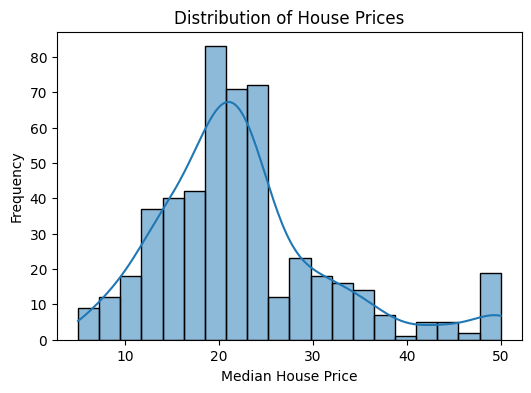

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(data_frame['medv'], bins=20, kde= True)
plt.xlabel('Median House Price')
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

#### Effect of CHAS on Prices

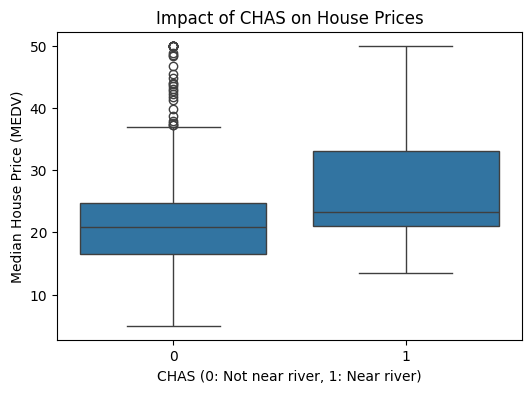

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data_frame['chas'], y=data_frame['medv'])
plt.xlabel("CHAS (0: Not near river, 1: Near river)")
plt.ylabel("Median House Price (MEDV)")
plt.title("Impact of CHAS on House Prices")
plt.show()

#### CRIM(Crime Rate ) vs MEDV

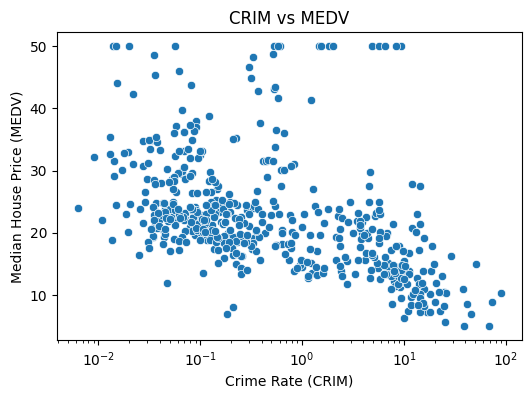

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data_frame['crim'], y=data_frame['medv'])
plt.xlabel("Crime Rate (CRIM)")
plt.ylabel("Median House Price (MEDV)")
plt.title("CRIM vs MEDV")
plt.xscale('log')  # Log scale for better visualization
plt.show()


#### LSTAT(Lower Status Population) VS MEDV

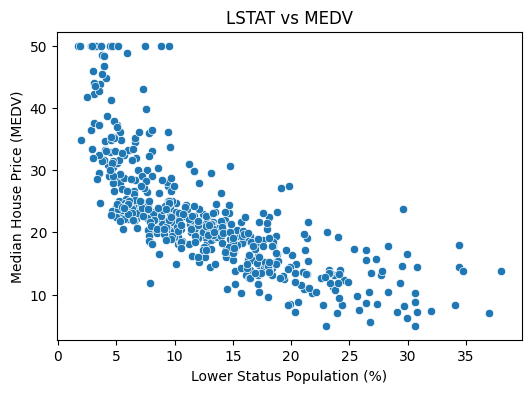

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data_frame['lstat'], y=data_frame['medv'])
plt.xlabel("Lower Status Population (%)")
plt.ylabel("Median House Price (MEDV)")
plt.title("LSTAT vs MEDV")
plt.show()


#### Correlation Heatmap

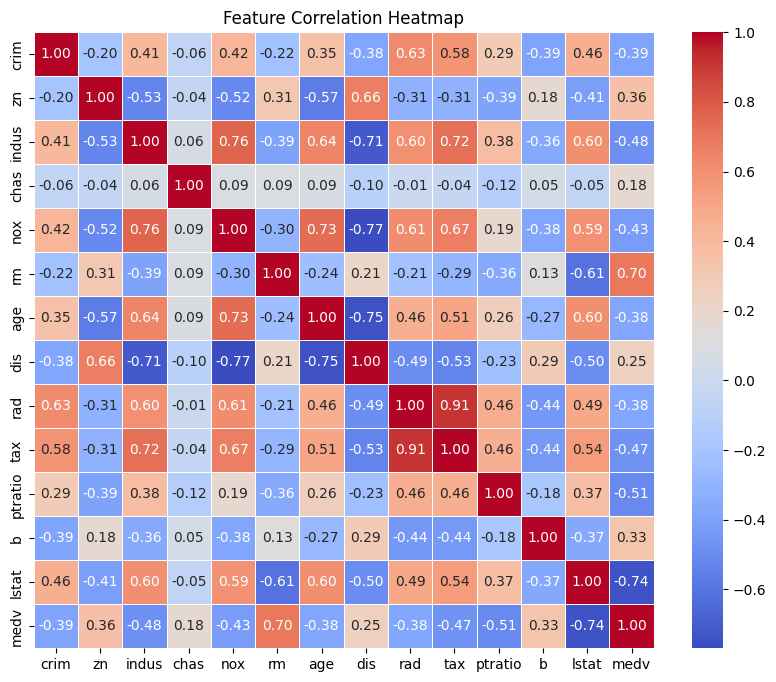

In [13]:
# Compute correlation matrix
correlation_matrix = data_frame.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()